# ℹ️ Introduction to data science notebooks

You can skip this section if you are already familiar with data science notebooks.

## Data science notebooks
A _data science notebook_ is a document that contains text cells (what you're reading right now) and code cells. What is unique with a notebook is that it's **interactive**: You can change or add code cells, and then **run** a cell by selecting it and then clicking the **Run** button above ( <strong>▶</strong>, or Run All ) or hitting `shift + enter`.

The result will be displayed directly in the notebook. 

Try running the cell below:

In [17]:
# Run this cell to see the result
100 * 1.75 * 16

2800.0

Modify any of the numbers and rerun the cell.

## Data science notebooks & data analysis
Notebooks are great for interactive data analysis. Let's create a pandas DataFrame using the `read_csv()` function. 

We will load the dataset "sales_data.csv" containing three months of sales data for the company. We use the `parse_dates` option to ensure that the "date" column is loaded correctly.

By using the `head()` command, we display the first five rows of data:

In [18]:
# Importing the pandas module
import pandas as pd

# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## Data analysis example:

Find the total sales for each warehouse. 

We can use `groupby` to group the information by the column "warehouse". Then we select the column "total" and use `.sum()` to add the "total" column for each warehouse:

In [19]:
df.groupby('warehouse')[['total']].sum()

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


## Data science notebooks & visualizations
Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.

It is very straightforward to include plots in a data science notebook. For example, let's look at the average number of items purchased by each client type. 

We are using the `matplotlib.pyplot` library for this example. We will run the `.plot()` method on the data we want to display and call `plt.show()` to draw the plot:

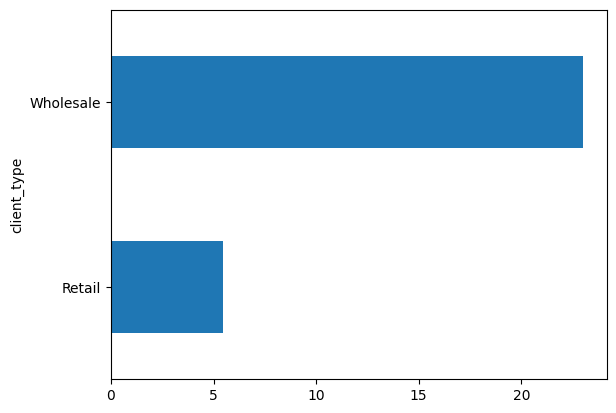

In [20]:
import matplotlib.pyplot as plt

avg_units_client_type = df.groupby('client_type')['quantity'].mean()
avg_units_client_type.plot(kind='barh')
plt.show()

# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [21]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [23]:
#1. What are the total sales for each payment method?
# using groupby function

total_sales = df.groupby('payment')[['total']].sum()
total_sales



,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


In [24]:
#2. What is the average unit price for each product line?
avg_unit = df.groupby('product_line')['unit_price'].mean()
avg_unit 

product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64

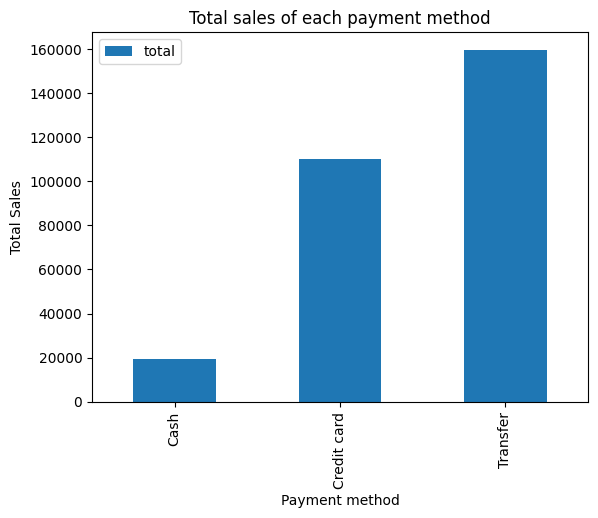

In [25]:
#3. Create plots to visualize findings for questions 1 and 2.
#using bar chart
#1a.
total_sales.plot(kind='bar')
plt.xlabel("Payment method")
plt.ylabel("Total Sales")
plt.title("Total sales of each payment method")
plt.show()

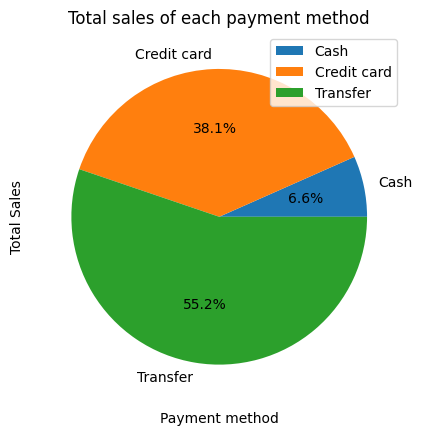

In [26]:
#1b. 
total_sales.plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.xlabel("Payment method")
plt.ylabel("Total Sales")
plt.title("Total sales of each payment method")
plt.show()

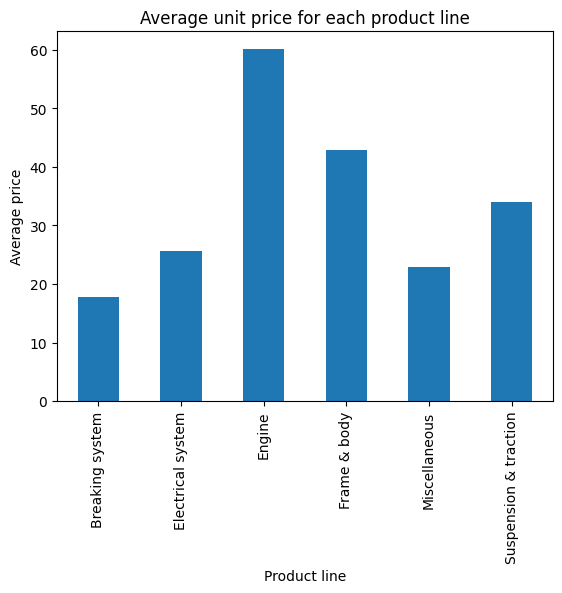

In [27]:
#3.
#2a.
avg_unit.plot(kind='bar')
plt.xlabel("Product line")
plt.ylabel("Average price")
plt.title("Average unit price for each product line")
plt.show()

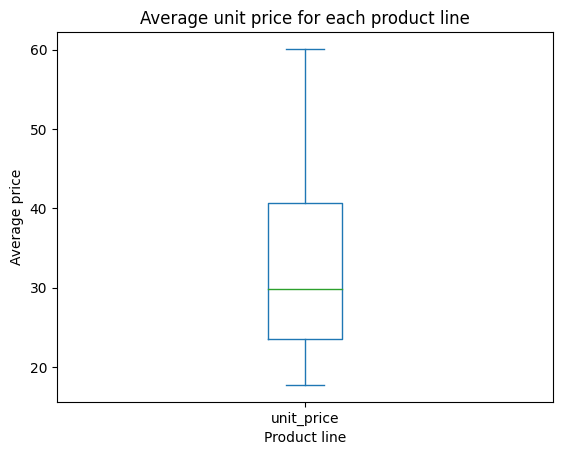

In [28]:
#3.
#2b.
avg_unit.plot(kind='box')
plt.xlabel("Product line")
plt.ylabel("Average price")
plt.title("Average unit price for each product line")
plt.show()

In [29]:
#4a. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
avg_purchase = df.groupby('client_type')['unit_price'].mean()
avg_purchase


client_type
Retail       30.286852
Wholesale    30.443244
Name: unit_price, dtype: float64

In [30]:
#4b. 
tot_purchase = df.groupby('product_line')['total'].sum()
tot_purchase

product_line
Breaking system          38350.15
Electrical system        43612.71
Engine                   37945.38
Frame & body             69024.73
Miscellaneous            27165.82
Suspension & traction    73014.21
Name: total, dtype: float64

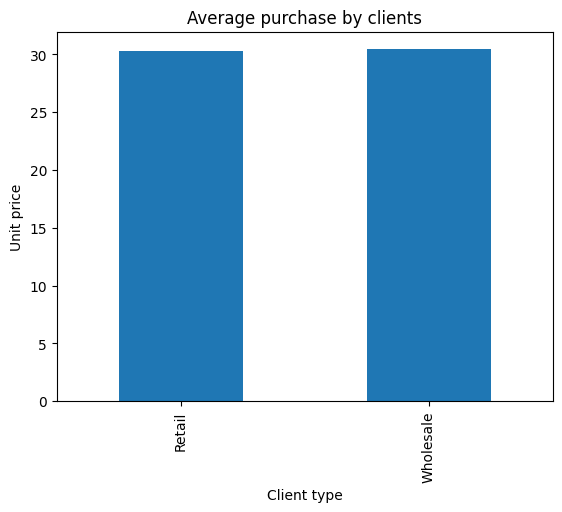

In [31]:
#4a. plot
avg_purchase.plot(kind='bar')
plt.xlabel("Client type")
plt.ylabel("Unit price")
plt.title("Average purchase by clients")
plt.show()

#5. The findings from the sales data include:
- it showed that the clients preferred to make payments using the transfer payment method and cash payment was the least method of payment by clients
- The wholesalers purchased more goods than the retailers
- The engine product line had the highest average unit price 
- miscellaneous had the least average unit price compared to all the other product-line.



